# Example 7 - Demonstrate Corner-Cases of Nodal Analysis

In [1]:
from CircuitCalculator.SimpleCircuit.styles.styling import select
select(style='DIN')
from CircuitCalculator.SimpleCircuit.Elements import Schematic, Resistor, Line, Ground, CurrentSource, RealCurrentSource, VoltageSource
from CircuitCalculator.SimpleCircuit.DiagramSolution import real_solution

Consider two corner-cases for nodal analysis
1. Parallel resistance of voltage source (uncomment `Rparallel`)
2. Series resistance of current source (uncomment `Rserial`)

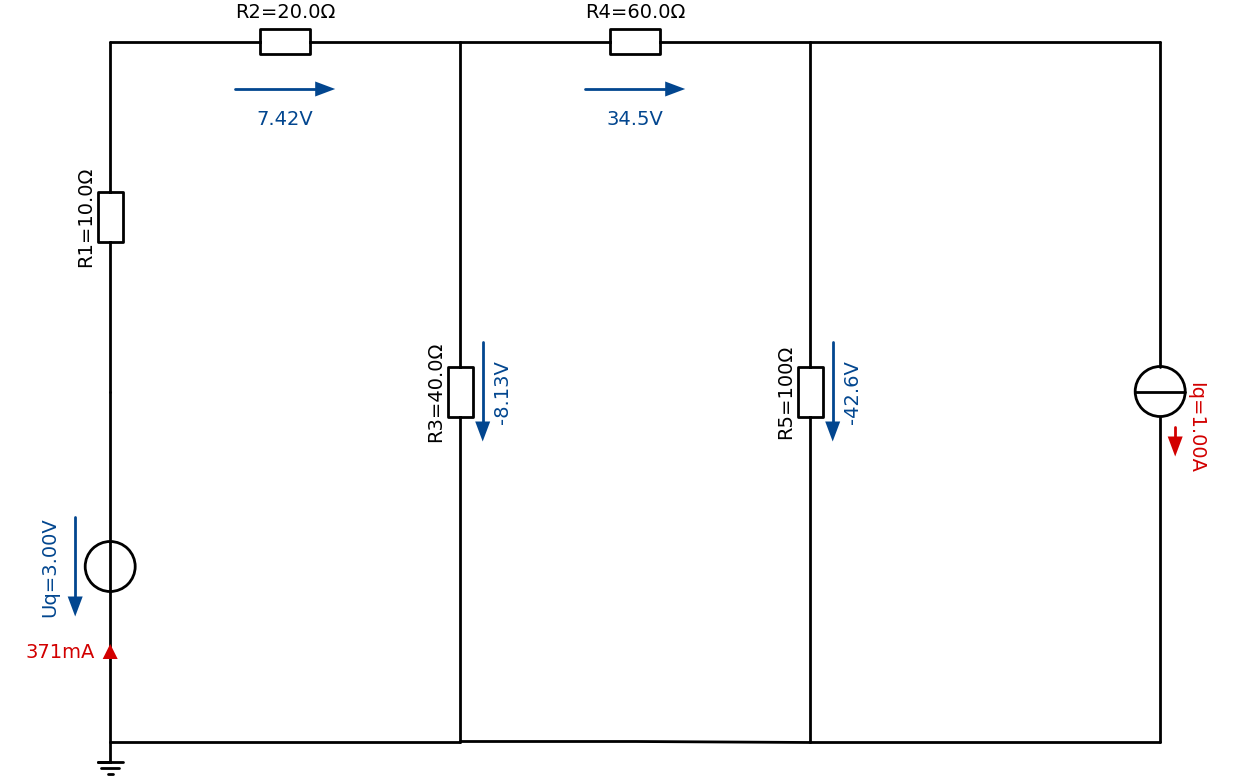

In [2]:

with Schematic(unit=7) as schematic:
    schematic += (Uq:=VoltageSource(V=3, name='Uq', reverse=True).up())
    schematic += Resistor(R=10, name='R1').up()
    schematic += (R2:=Resistor(R=20, name='R2').right())
    schematic += Resistor(R=40, name='R3').down().length(14)
    schematic += Line().left()
    schematic += Ground()
    schematic += (R4:=Resistor(R=60, name='R4').right().at(R2.end))
    schematic += (R5:=Resistor(R=100, name='R5').down().length(14))
    schematic += Line().right().at(R4.end)
    schematic += CurrentSource(I=1, name='Iq').down().length(14)
    schematic += Line().left()
    schematic += Line().left()
    schemdraw_solution = real_solution(schematic=schematic)
    schematic += schemdraw_solution.draw_current('Uq', reverse=True)
    schematic += schemdraw_solution.draw_voltage('R2')
    schematic += schemdraw_solution.draw_voltage('R3')
    schematic += schemdraw_solution.draw_voltage('R4')
    schematic += schemdraw_solution.draw_voltage('R5')